In [12]:
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
file_path = '../data/20210518_142318.lag'

# Initialize variables
data = {}
current_column = None

# Function to process the file in chunks
def process_file(file_path, hard_stop=10):
    reads = 0
    with open(file_path, 'r') as file:
        for line in tqdm(file, desc="Processing file"):
            line = line.strip()  # Remove any extra whitespace
            if line.startswith("TBP:"):
                reads+=1
                if reads>10:
                    return data
                # If the line starts with "TBP:", it's a new column header
                current_column = line
                if current_column not in data:
                    data[current_column] = []  # Initialize an empty list for this column
            else:
                # Otherwise, it's a value for the current column
                if current_column is not None:
                    data[current_column].append(float(line))  # Convert to float and add to the column
    return data


In [7]:
# Process the file
data = process_file(file_path)

In [8]:
df = pd.DataFrame(data)

In [9]:
df.shape

(4998, 10)

In [10]:
df

,TBP:51491,TBP:168153,TBP:2613,TBP:111025,TBP:10736,TBP:3511,TBP:122933,TBP:5029,TBP:5166,TBP:6927
0,198.0,195.0,197.0,195.0,197.0,198.0,197.0,196.0,198.0,197.0
1,197.0,194.0,197.0,194.0,196.0,196.0,197.0,193.0,197.0,196.0
2,197.0,194.0,198.0,194.0,197.0,198.0,197.0,194.0,198.0,197.0
3,196.0,194.0,196.0,192.0,196.0,197.0,196.0,192.0,197.0,196.0
4,197.0,194.0,196.0,194.0,197.0,197.0,197.0,194.0,197.0,197.0
...,...,...,...,...,...,...,...,...,...,...
4993,193.0,198.0,193.0,196.0,196.0,197.0,197.0,195.0,187.0,211.0
4994,197.0,192.0,197.0,199.0,197.0,196.0,198.0,198.0,199.0,197.0
4995,197.0,191.0,196.0,198.0,196.0,195.0,198.0,197.0,199.0,197.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: ylabel='TBP:51491'>

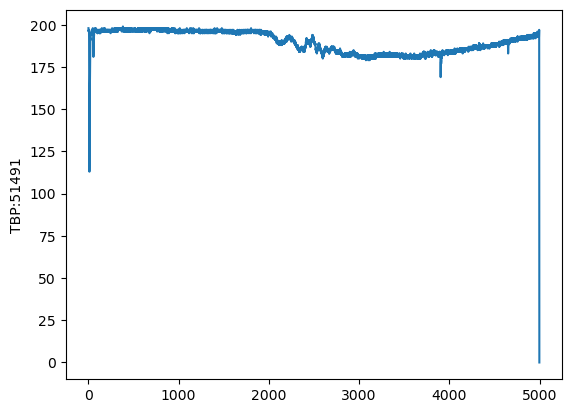

In [13]:
sns.lineplot(df['TBP:51491'])